# TME4 - Perceptron


In [ ]:
from tme4 import *
from mltools import *
from sklearn.model_selection import train_test_split


In [ ]:
def plot_evolution(losses, scores):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    ax[0].plot(losses)
    ax[0].set_title("Evolution du cout en fonction du nombre d'itérations")
    ax[1].plot(scores)
    ax[1].set_title(
        "Evolution du score en apprentissage en fonction du nombre d'itérations"
    )
    plt.tight_layout()
    plt.show()


# Données linéairement séparables

Mélange de 2 gaussiennes, peu de bruit :


Mélange de gaussiennes, bruitées :


Marche très bien sur des données linéaires, même si très bruitées.


# Données USPS


In [ ]:
alltrainx, alltrainy = load_usps("../data/USPS_train.txt")
alltestx, alltesty = load_usps("../data/USPS_test.txt")


def load_one_class(number):
    X_train, y_train = get_usps(number, alltrainx, alltrainy)
    X_test, y_test = get_usps(number, alltestx, alltesty)
    y_train = np.where(y_train == number, -1, 1).reshape(-1, 1)
    y_test = np.where(y_test == number, -1, 1).reshape(-1, 1)
    return X_train, y_train, X_test, y_test


def load_two_classes(neg, pos):
    X_train, y_train = get_usps([neg, pos], alltrainx, alltrainy)
    X_test, y_test = get_usps([neg, pos], alltestx, alltesty)
    y_train = np.where(y_train == neg, -1, 1).reshape(-1, 1)
    y_test = np.where(y_test == neg, -1, 1).reshape(-1, 1)
    return X_train, y_train, X_test, y_test


## 6 vs 9


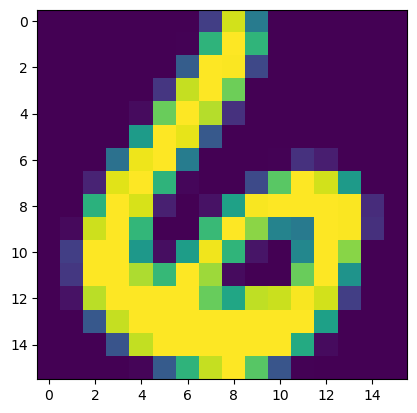

In [ ]:
X_train, y_train, X_test, y_test = load_two_classes(6, 9)
show_usps(X_train[0])
plt.show()


### Ajout d'un biais linéaire


## One-vs-all


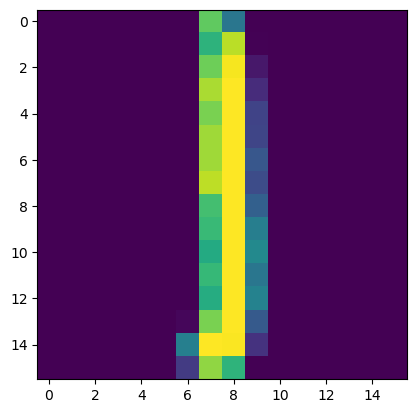

In [ ]:
X_train, y_train, X_test, y_test = load_one_class(1)
show_usps(X_train[0])
plt.show()


### Ajout d'un biais linéaire


Marche très bien également, notons que la façon d'initialiser nos poids a un impact sur le $w$ optimal.


# Données non linéairement séparables

(mélange de 4 gaussiennes)

Comme nous l'avons vu dans le TME précédemment, il est impossible de séparer de telles données. La solution est de projeter les données à l'aide d'une projection polynomiale, voire gaussienne.


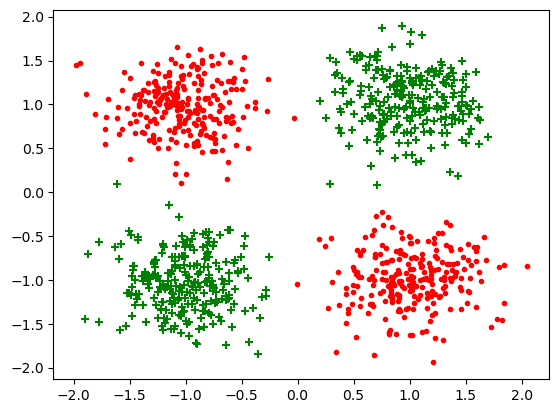

In [ ]:
X, y = gen_arti(nbex=1000, data_type=1, epsilon=0.02)
plot_data(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y)


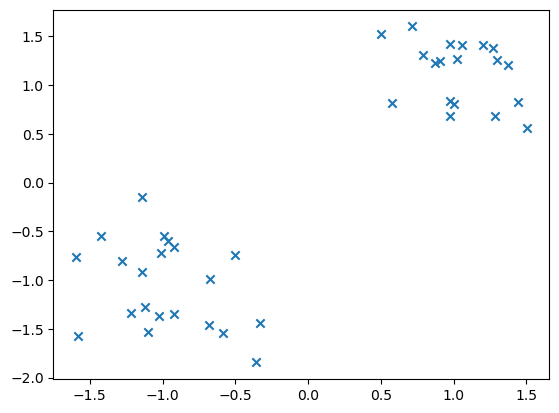

In [ ]:
b = 40  # nombre de points de la base
pos = X_train[y_train[:, 0] == 1]
idx = np.random.choice(len(pos), size=b, replace=False)
B = pos[idx]
plot_data(B)


Je ne sais pas pourquoi le score est de 50 %... c'est comme si je classifiais tout dans une classe... alors que la frontière est correcte..?


# Echequier


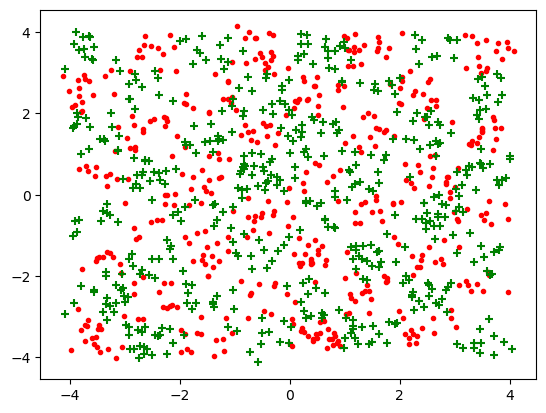

In [ ]:
X, y = gen_arti(epsilon=0.1, data_type=2)
plot_data(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y)


Enfin, ici, pour séparer nos données, il faut faire appel à une projection gaussienne.


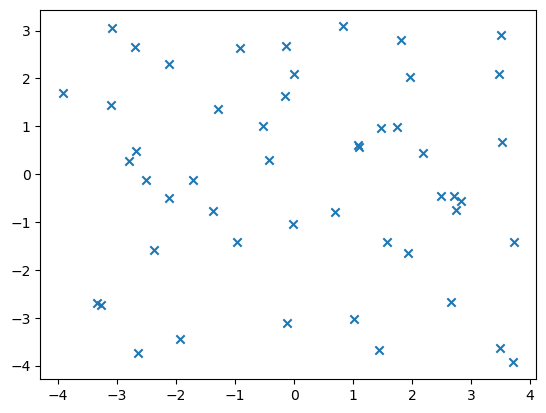

In [ ]:
b = 50  # nombre de points de la base
pos = X_train[y_train[:, 0] == 1]
idx = np.random.choice(len(pos), size=b, replace=False)
B = pos[idx]
plot_data(B)


Je m'attendais à quelque chose de mieux, je ne crains m'être trompé quelque part : sûrement la façon dont je créé la base.
